# Digital image formation and from Green Screen to Awesomeness!

### Import resources

We are going to use OpenCV, a popular computer vision library that has meany built in tools for image analysis and understanding!

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

# What are the images to a computer?

Digital images are nothing more than a 2D representations of 3D world scenes. Actually, they can be broken down into a grid of small units of color and intensity called __pixels__, which are just a numerical value! When we say, for example, that an image is $50 \times 50$, what we mean is that it is represented by a $50 \times 50$ matrix, where the elements of this matrix is a pixel. As you probably can imagine, more dimentions of this matrix often mean better quallity!

But this is the half truth! In reality, when an image is a 2D matrix, is a __gray__ image, where the elements of the matrix indicate the brightness of the respectively pixel. Usually we have range from 0-1 or 0-255, where 0 indicates total black and 1 or 255 pure white.

So, what about the colored images? A common representation of a image is the __RGB__ color space. What that means is that each color is represented by a summation of _red_, _green_ and _blue_ values. The motivation behind it is that with RGB we can make any other color. For example, purple is just 107 (red) + 63 (green) + 160 (blue) in the 0-255 scale.

And here is where the __magic__ happens; Every color image is represented by a stuck of three matrices, each for every RGB color (or __color channels__), the one behind the other! In this way, each pixel has now three values; one for red, one for blue and one for green, and when we add them, we take the final color! Therefore, a color image has, for example, $50 \times 50 \times 3$ dimentions but the corresponding gray $50 \times 50 \times 1$.

In other words, it's helpful to think of the depth as three stacked 2D colored layers. One layer is red, one green, and one blue. And when stacked together they create a complete color image.


Let's see those in action! (Pay attention to the image dimantions).

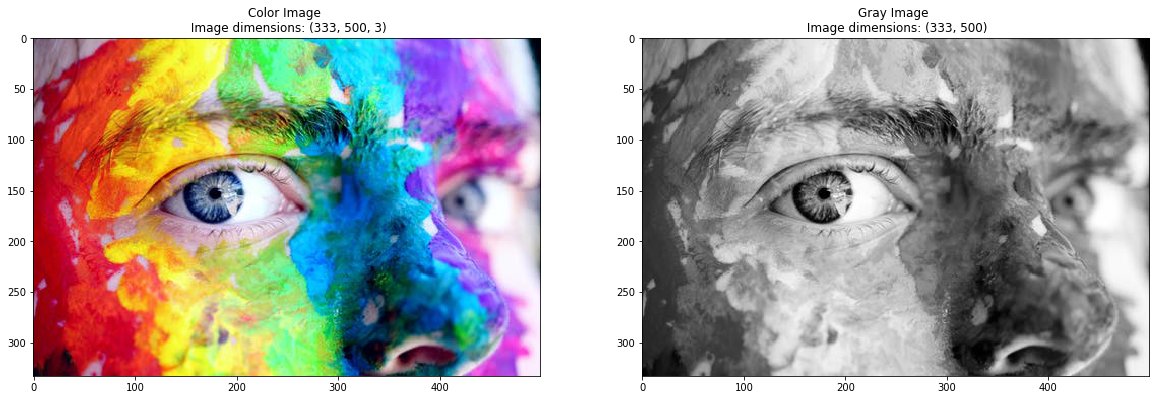

In [2]:
# Read in the image
image = mpimg.imread('images/color_img.jpg')

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display the image
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Color Image \n Image dimensions: {}'.format(image.shape))
ax1.imshow(image)
ax2.set_title('Gray Image \n Image dimensions: {}'.format(gray_image.shape))
ax2.imshow(gray_image, cmap='gray');

# RGB channels 

Let's visualize the levels of each color channel. As you will see, because each channel is just a 2D matrix, it would be a gray image, where the more white a pixel is, more intense this color is! Take a look at left part of the red channel image; it is more white than the middle. If you compaire it with the original RGB image, you will notice that the left part of the man's face is red but the noise blue!

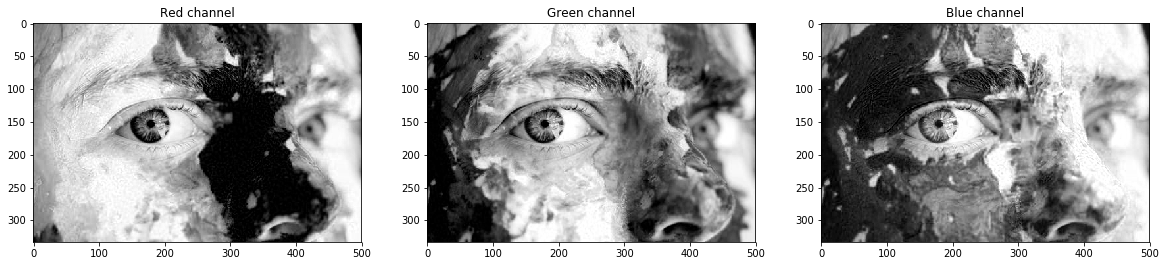

In [3]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Red channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('Green channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('Blue channel')
ax3.imshow(b, cmap='gray');

# From Green Screen to Space!

Let's make this Astronaut flow into space!

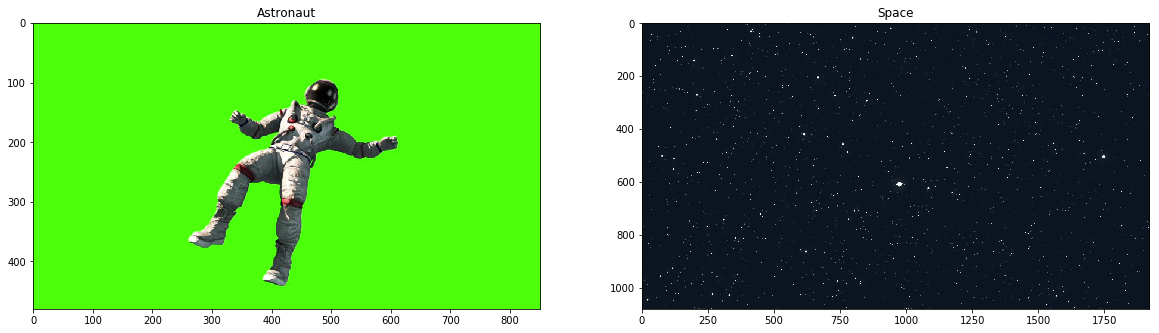

In [12]:
# Read in the images
img_astr = mpimg.imread('images/Astronaut.jpg')
background_image = mpimg.imread('images/space.png')

# Visualize the individual color channels
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Astronaut')
ax1.imshow(img_astr, cmap='gray')
ax2.set_title('Space')
ax2.imshow(background_image, cmap='gray');

### #1 - Define the color threshold

First, we have to define the color threshold that we want to isolate, green!

In [123]:
## First, we need to define our color selection boundaries in RGB values to isolate the green background.
## --> play around with these values until you isolate the blue background.

# An array of three values, one for each color [Red, Green, Blue]

# As a lowest threshold that contains the green color, for red and blue we set them to zero,
# as it is ok to not have any. But the lowest value of blue, should be high, let's say 230 out of 255.

# Any color between this color range, would be emitted!

lower_green = np.array([0,110,0]) # lower_green = np.array([0,100,0]) 
upper_green = np.array([140,255,90])

### #2 - Create a mask

Masks are a common way to isolate areas of interest. For us, this is the Astronaut. Let's isolate him from this green background!

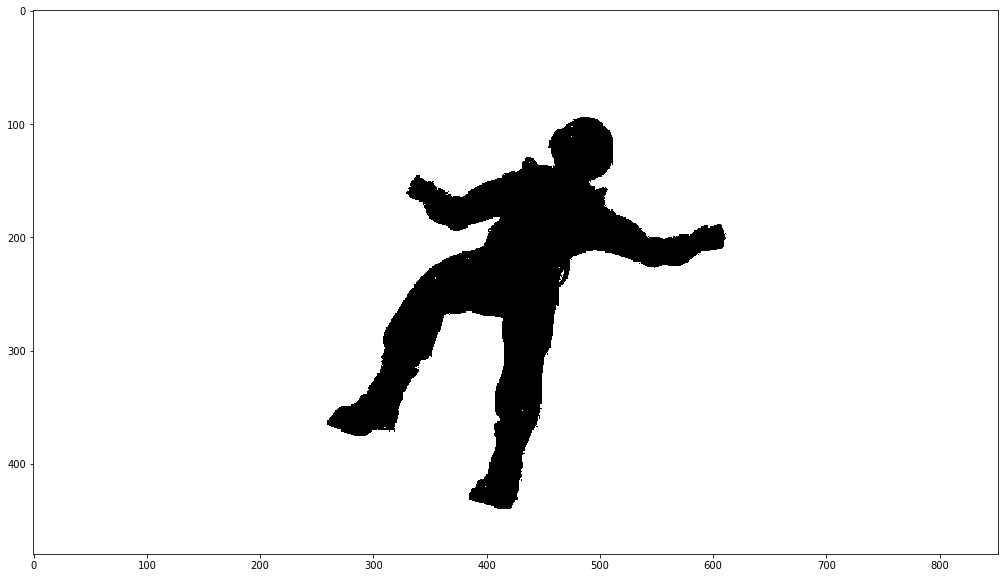

In [124]:
# Define the masked area
# mask: take the image and two vectors of color range; if a color of a pixel 
# falls between this range, it will let as it is. If not, it will block it and make the pixel black!

mask = cv2.inRange(img_astr, lower_green, upper_green)

# Vizualize the mask
plt.figure(figsize=(20,10))
plt.imshow(mask, cmap='gray');

### 3 - Bring the color back!

But, hey, where did the color went? One way to select the green screen area is by asking for the part of that image that __overlaps__ with the part of the mask that is white or not black! 

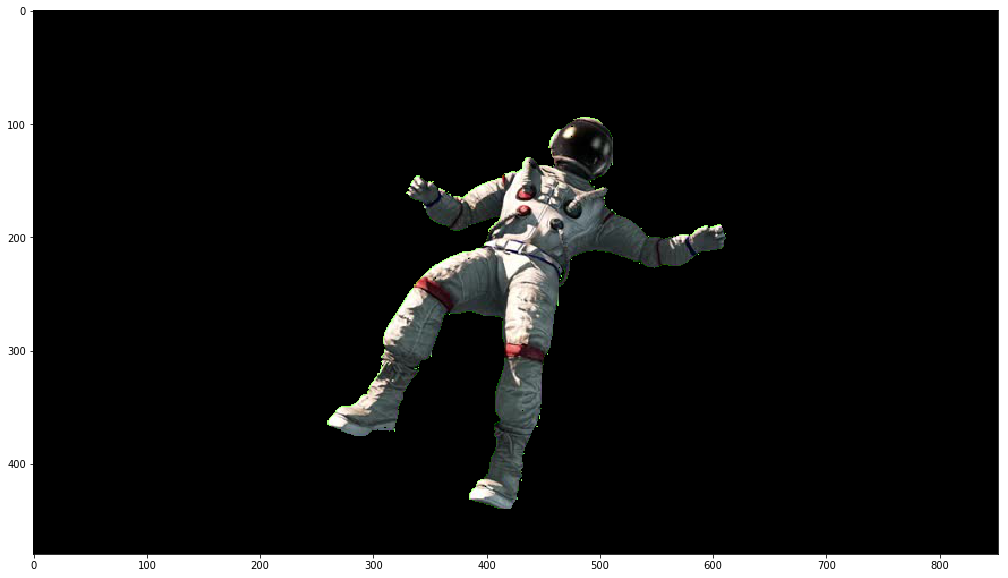

In [125]:
# copy the astronaut image to masked_image, in case we need the former
masked_image = np.copy(img_astr)

# select the part of the image where the area of the mask is not equal to zero
masked_image[mask != 0] = [0, 0, 0]

# Visualize!
plt.figure(figsize=(20,10))
plt.imshow(masked_image);

### #4 - Configure the background image

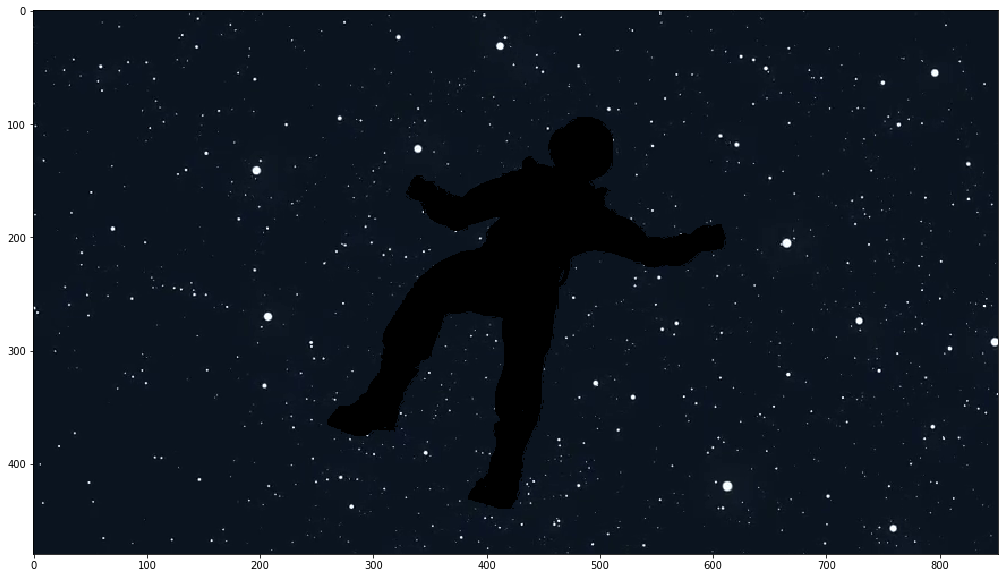

In [126]:
# We need to crop or resize the background to be the right size, and that is the dimentions
# of the astronaut image

# get the dimentions of the astronaut image
height, width, channels = image.shape

crop_background = background_image[0:height, 0:width]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Let's see it!
plt.figure(figsize=(20,10))
plt.imshow(crop_background);

### Take him to the space!

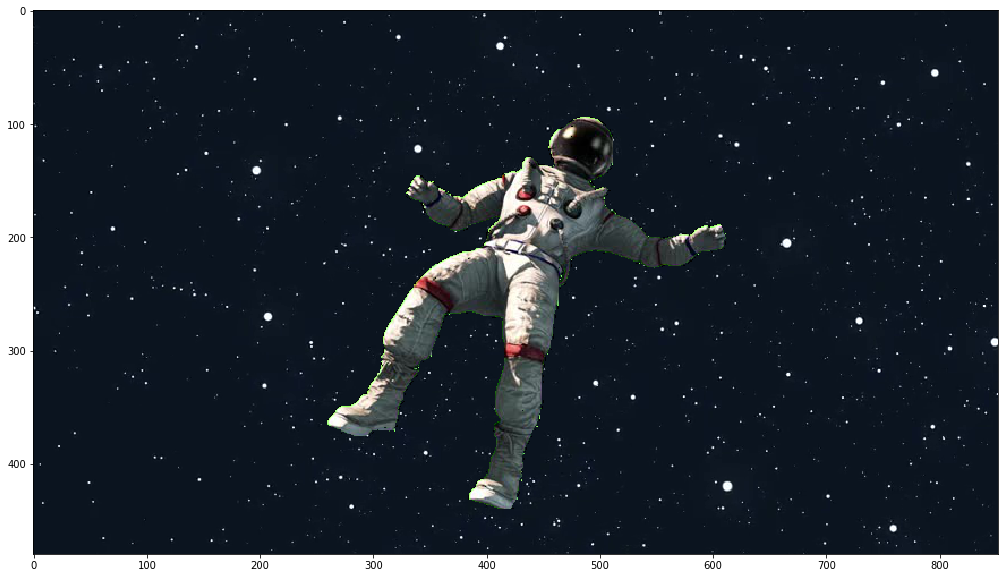

In [127]:
crop_background = cv2.normalize(crop_background, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

crop_background = crop_background.astype(np.uint8)


# Add the two images together to create a complete image!
complete_image =  crop_background + masked_image

# Aaaaaaand
plt.figure(figsize=(20,10))
plt.imshow(complete_image);